<a href="https://colab.research.google.com/github/pfiuza08/ia-estrategica-varejo/blob/main/Varejo_Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise Preliminar de Dados para Varejista de Vinhos.

Objetivo entender o comportamento dos consumidores, e permitir análises como as listadas abaixo e otimizar vendas:

Quais tipos de vinhos são mais comprados por faixa etária ou perfil de cliente.
Frequência de compra.
Valor médio por compra.
Segmentação de clientes.
Preferências por origem do vinho (nacional/importado), tipo (tinto, branco, rosé), e faixa de preço.

In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Configurações iniciais
np.random.seed(42)
n_clientes = 200

# Gerar dados
ids = range(1001, 1001 + n_clientes)
sexo = np.random.choice(['M', 'F'], n_clientes)
idade = np.random.randint(25, 70, n_clientes)
estados = np.random.choice(['SP', 'RJ', 'MG', 'RS', 'PR', 'BA'], n_clientes)
frequencia = np.random.poisson(4, n_clientes)
ultimas_compras = [datetime(2025, 7, 3) - timedelta(days=int(x)) for x in np.random.randint(1, 90, n_clientes)]
valor_medio = np.round(np.random.normal(120, 30, n_clientes), 2)
tipos = np.random.choice(['Tinto', 'Branco', 'Rosé', 'Espumante'], n_clientes, p=[0.5, 0.25, 0.15, 0.10])
origens = np.random.choice(['Nacional', 'Importado'], n_clientes, p=[0.6, 0.4])
total_gasto = np.round(valor_medio * frequencia, 2)
canais = np.random.choice(['Online', 'Loja Física', 'WhatsApp'], n_clientes, p=[0.5, 0.4, 0.1])

# Criar DataFrame
df = pd.DataFrame({
    'ID_Cliente': ids,
    'Sexo': sexo,
    'Idade': idade,
    'Estado': estados,
    'Frequência_Compra': frequencia,
    'Última_Compra': ultimas_compras,
    'Valor_Médio': valor_medio,
    'Tipo_Favorito': tipos,
    'Origem_Favorita': origens,
    'Total_Gasto': total_gasto,
    'Canal_Compra': canais
})

# Salvar como CSV (opcional)
df.to_csv('dados_clientes_vinhos.csv', index=False)

# Visualizar exemplo
df.head()


,ID_Cliente,Sexo,Idade,Estado,Frequência_Compra,Última_Compra,Valor_Médio,Tipo_Favorito,Origem_Favorita,Total_Gasto,Canal_Compra
0,1001,M,56,SP,5,2025-05-03,123.67,Tinto,Nacional,618.35,Online
1,1002,F,63,MG,4,2025-06-13,136.30,Tinto,Nacional,545.20,WhatsApp
2,1003,M,56,RJ,5,2025-04-16,121.47,Branco,Nacional,607.35,Loja Física
3,1004,M,28,SP,2,2025-07-01,121.22,Rosé,Nacional,242.44,Loja Física
4,1005,M,54,RJ,3,2025-04-21,98.94,Tinto,Importado,296.82,Online


ANÁLISE EXPLORATÓRIA DE DADOS

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_Cliente         200 non-null    int64         
 1   Sexo               200 non-null    object        
 2   Idade              200 non-null    int64         
 3   Estado             200 non-null    object        
 4   Frequência_Compra  200 non-null    int64         
 5   Última_Compra      200 non-null    datetime64[ns]
 6   Valor_Médio        200 non-null    float64       
 7   Tipo_Favorito      200 non-null    object        
 8   Origem_Favorita    200 non-null    object        
 9   Total_Gasto        200 non-null    float64       
 10  Canal_Compra       200 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 17.3+ KB
None

Resumo estatístico:
        ID_Cliente       Idade  Frequência_Compra   

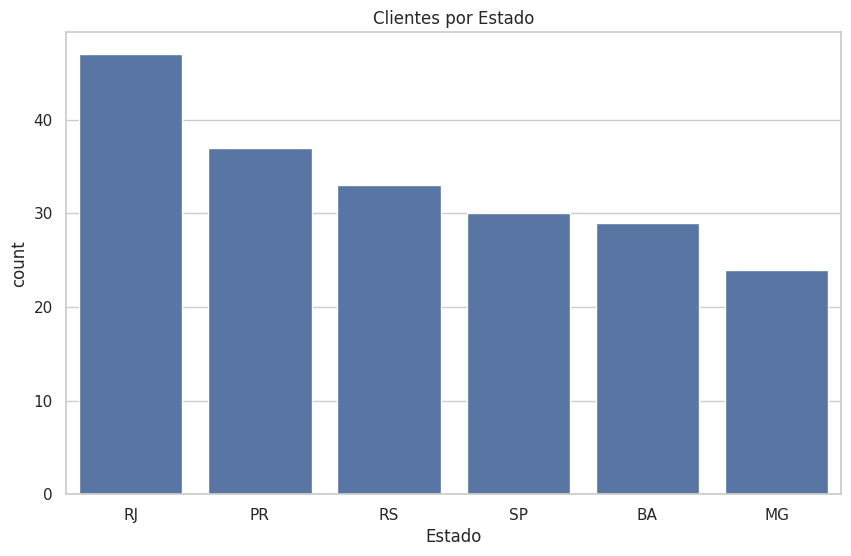

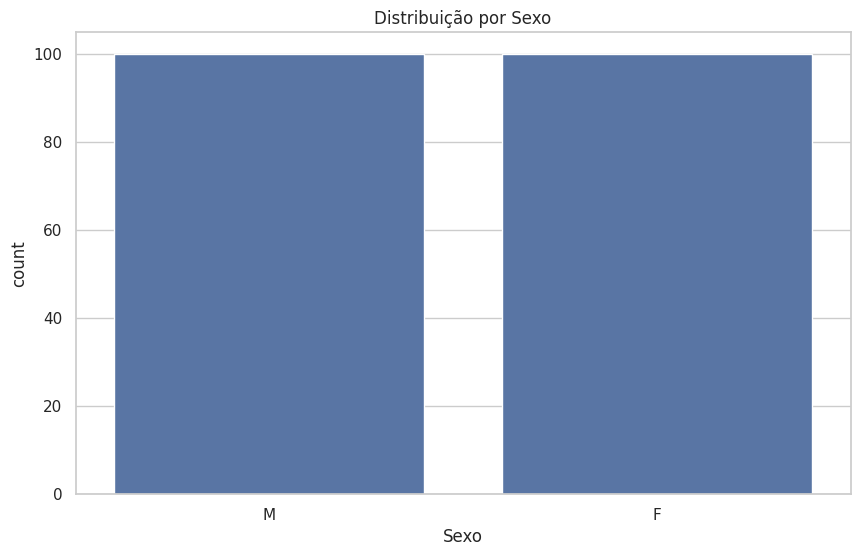

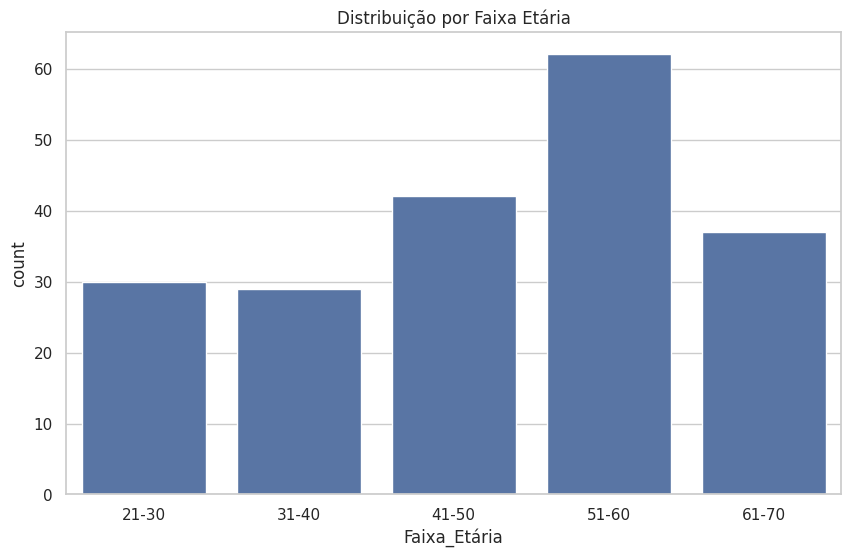

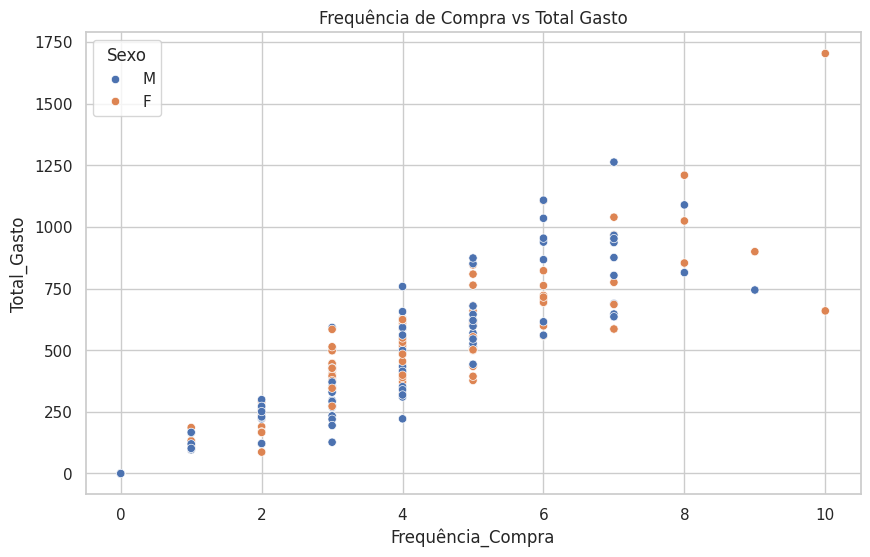

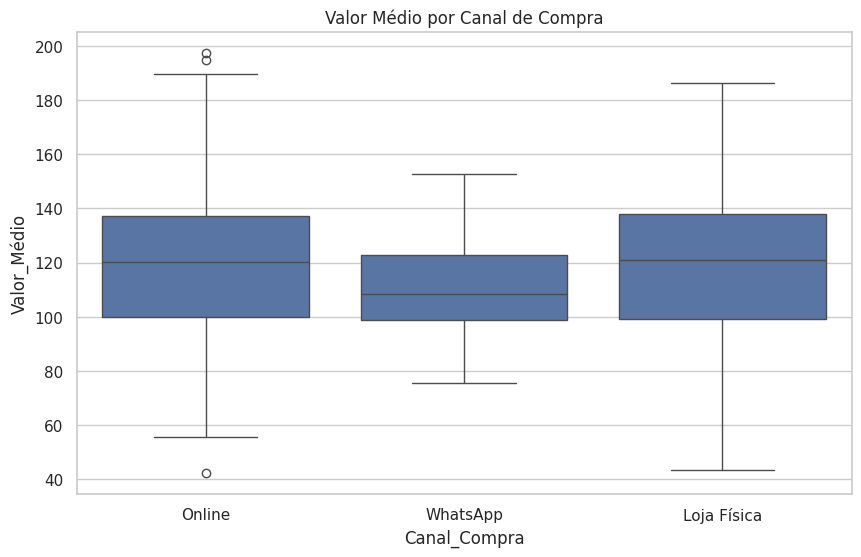

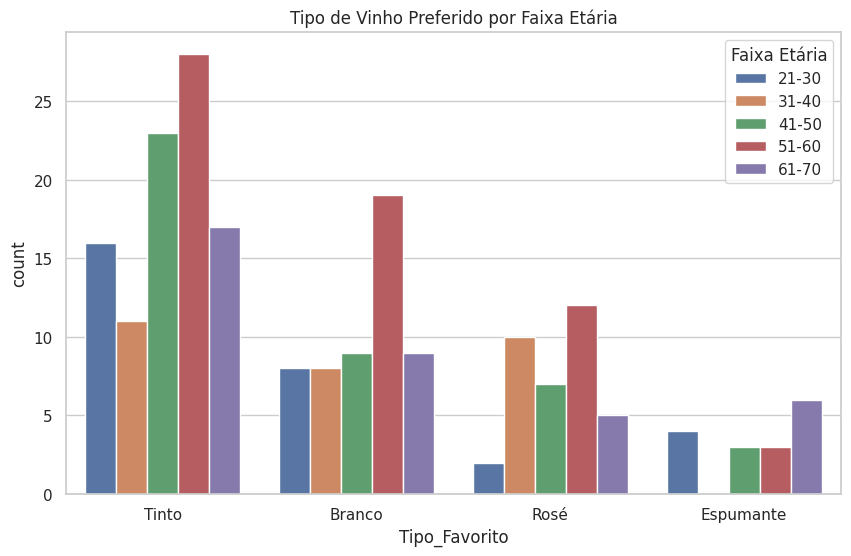

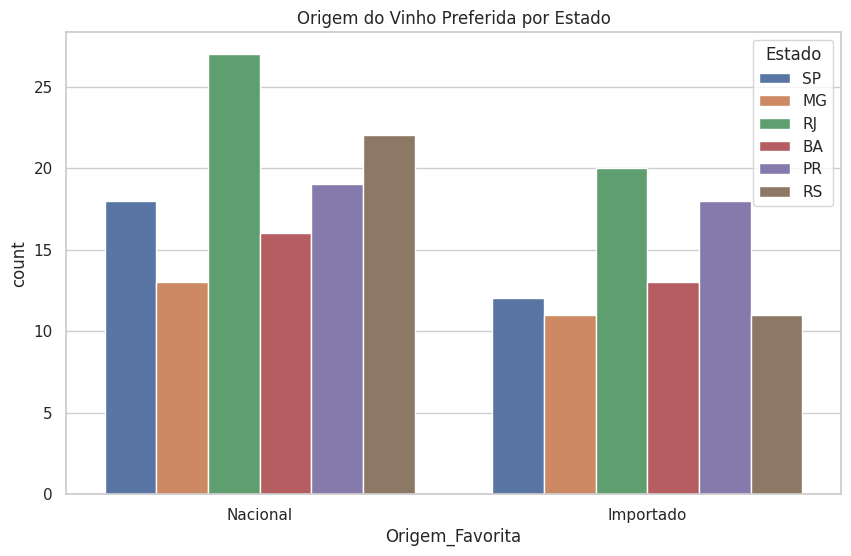

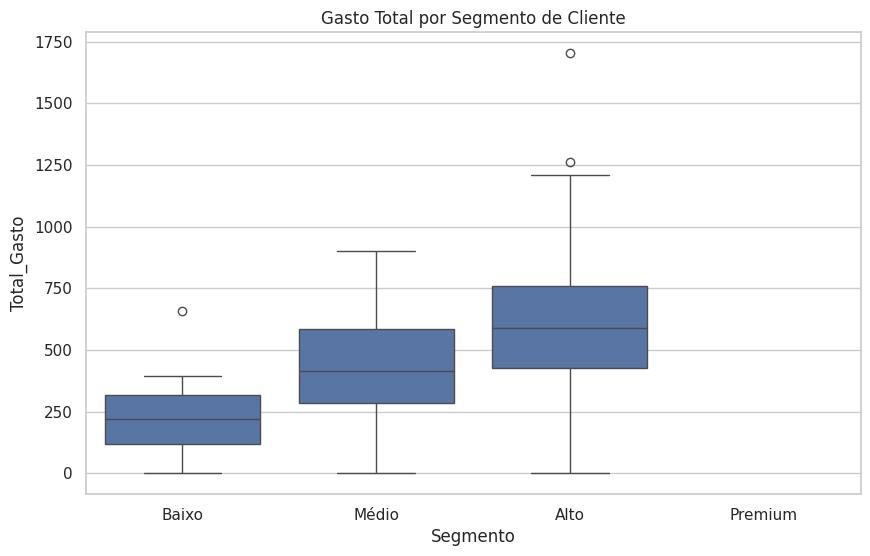

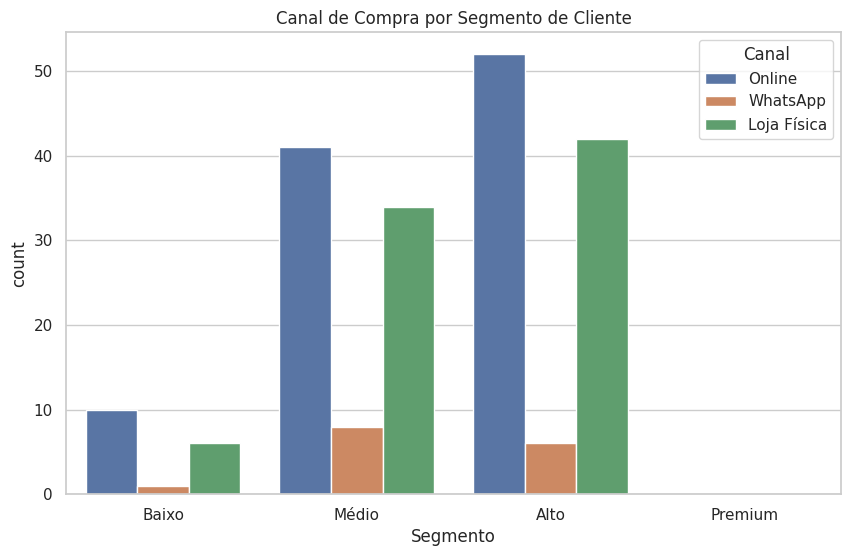

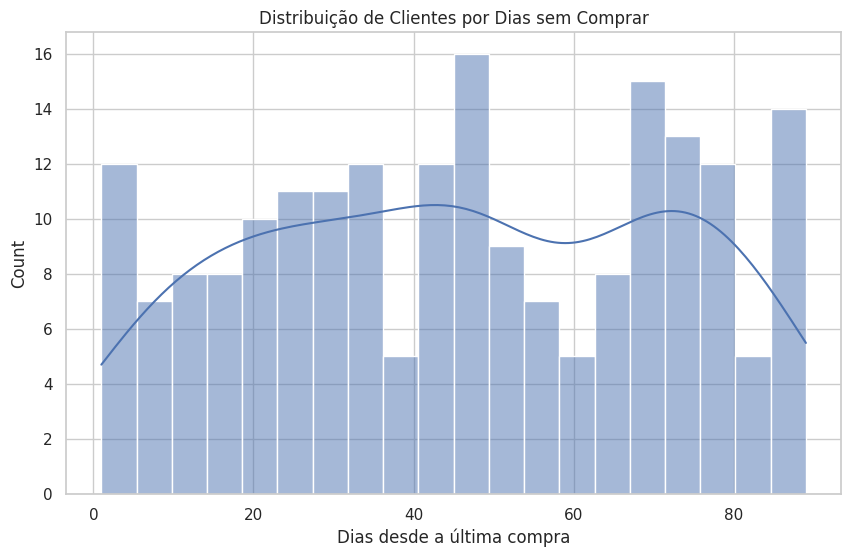


Clientes inativos (>60 dias sem comprar): 70


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configurações de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Carregar os dados
df = pd.read_csv("dados_clientes_vinhos.csv")

# Converter data
df['Última_Compra'] = pd.to_datetime(df['Última_Compra'])

# ----------------------------------------
# 1. VISUALIZAÇÃO INICIAL
# ----------------------------------------

print("Informações gerais:")
print(df.info())
print("\nResumo estatístico:")
print(df.describe())

print("\nDistribuição de valores únicos por categoria:")
for col in ['Sexo', 'Estado', 'Tipo_Favorito', 'Origem_Favorita', 'Canal_Compra']:
    print(f"{col}: {df[col].value_counts()}\n")

# ----------------------------------------
# 2. DISTRIBUIÇÃO DE CLIENTES
# ----------------------------------------

# Clientes por estado
sns.countplot(data=df, x='Estado', order=df['Estado'].value_counts().index)
plt.title("Clientes por Estado")
plt.show()

# Sexo
sns.countplot(data=df, x='Sexo')
plt.title("Distribuição por Sexo")
plt.show()

# Faixa etária
df['Faixa_Etária'] = pd.cut(df['Idade'], bins=[20, 30, 40, 50, 60, 70], labels=['21-30', '31-40', '41-50', '51-60', '61-70'])
sns.countplot(data=df, x='Faixa_Etária')
plt.title("Distribuição por Faixa Etária")
plt.show()

# ----------------------------------------
# 3. COMPORTAMENTO DE COMPRA
# ----------------------------------------

# Frequência vs Gasto Total
sns.scatterplot(data=df, x='Frequência_Compra', y='Total_Gasto', hue='Sexo')
plt.title("Frequência de Compra vs Total Gasto")
plt.show()

# Valor médio por canal de compra
sns.boxplot(data=df, x='Canal_Compra', y='Valor_Médio')
plt.title("Valor Médio por Canal de Compra")
plt.show()

# Tipo favorito por faixa etária
sns.countplot(data=df, x='Tipo_Favorito', hue='Faixa_Etária')
plt.title("Tipo de Vinho Preferido por Faixa Etária")
plt.legend(title='Faixa Etária')
plt.show()

# Origem favorita por estado
sns.countplot(data=df, x='Origem_Favorita', hue='Estado')
plt.title("Origem do Vinho Preferida por Estado")
plt.legend(title='Estado')
plt.show()

# ----------------------------------------
# 4. SEGMENTAÇÃO DE CLIENTES
# ----------------------------------------

# Criação de segmentos por valor médio
df['Segmento'] = pd.cut(df['Valor_Médio'], bins=[0, 80, 120, 200, 1000], labels=['Baixo', 'Médio', 'Alto', 'Premium'])

# Total gasto por segmento
sns.boxplot(data=df, x='Segmento', y='Total_Gasto')
plt.title("Gasto Total por Segmento de Cliente")
plt.show()

# Canal de compra por segmento
sns.countplot(data=df, x='Segmento', hue='Canal_Compra')
plt.title("Canal de Compra por Segmento de Cliente")
plt.legend(title='Canal')
plt.show()

# ----------------------------------------
# 5. CLIENTES INATIVOS
# ----------------------------------------

hoje = datetime(2025, 7, 3)
df['Dias_Sem_Comprar'] = (hoje - df['Última_Compra']).dt.days

# Histograma de dias sem compra
sns.histplot(df['Dias_Sem_Comprar'], bins=20, kde=True)
plt.title("Distribuição de Clientes por Dias sem Comprar")
plt.xlabel("Dias desde a última compra")
plt.show()

# Quantos clientes não compram há mais de 60 dias
inativos = df[df['Dias_Sem_Comprar'] > 60]
print(f"\nClientes inativos (>60 dias sem comprar): {len(inativos)}")


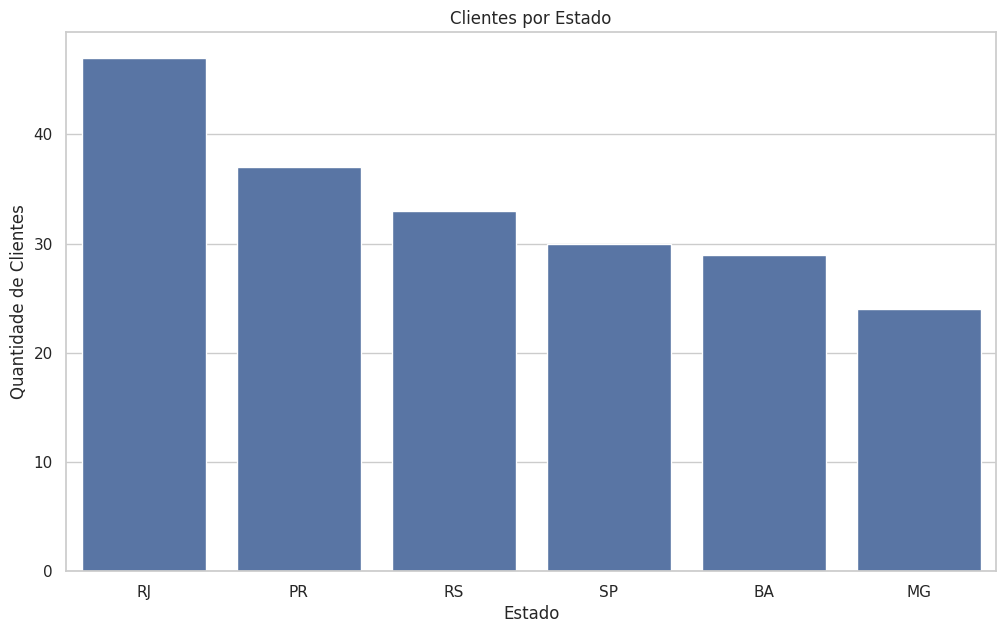

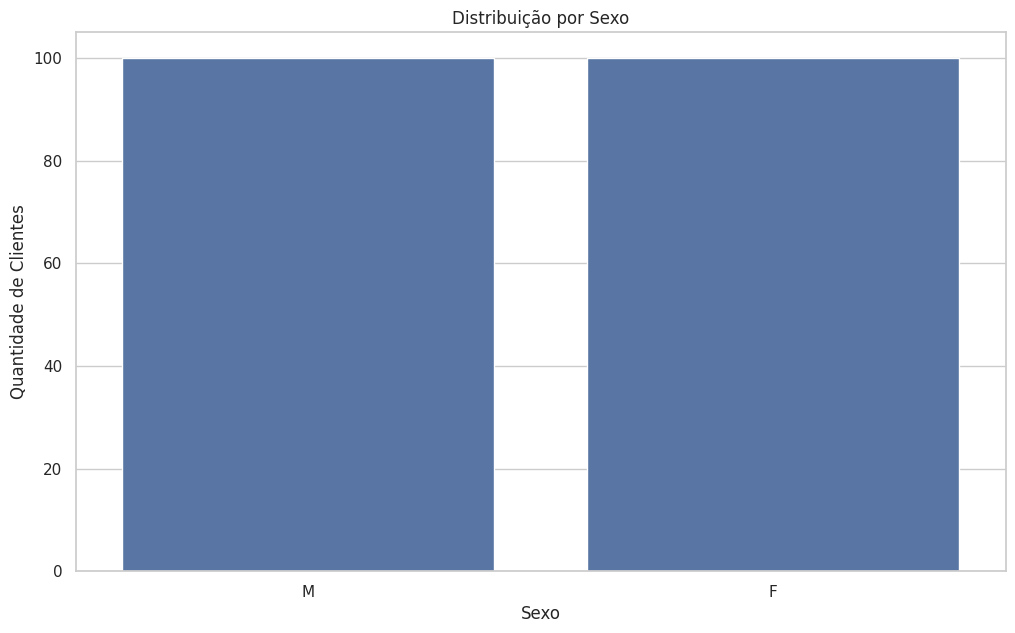

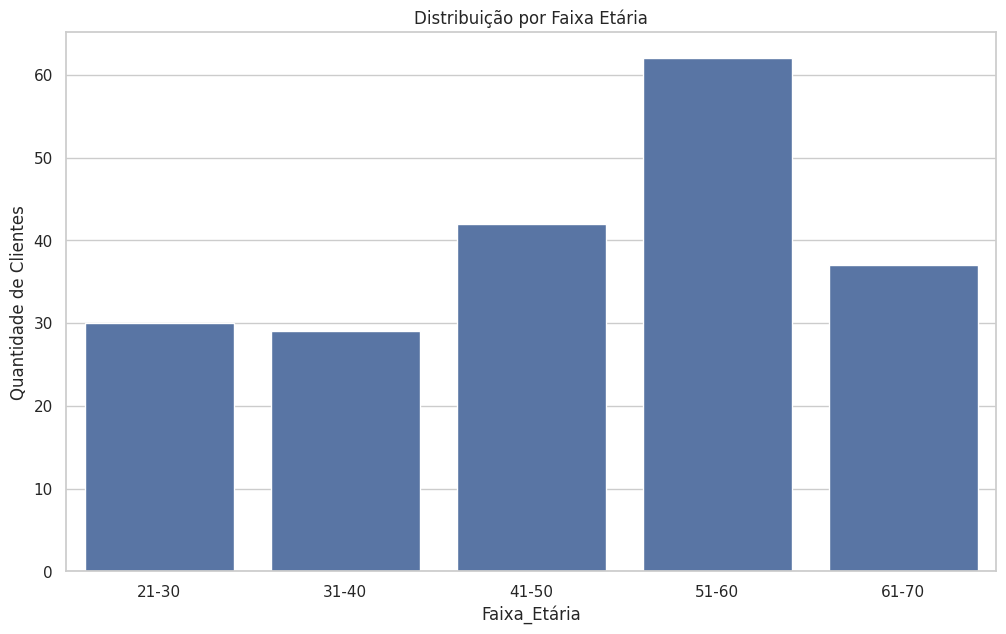

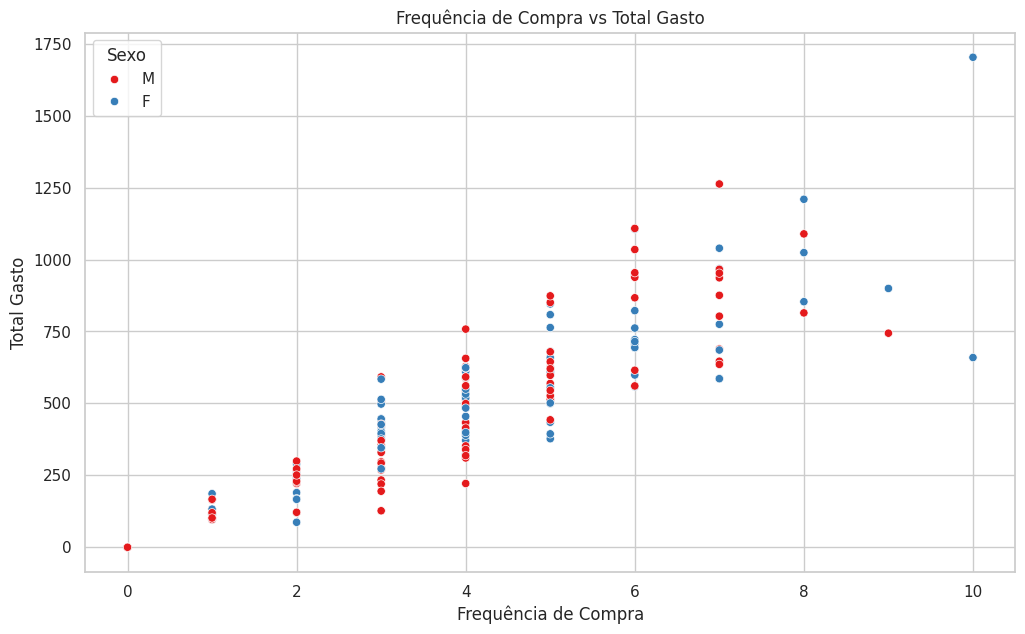

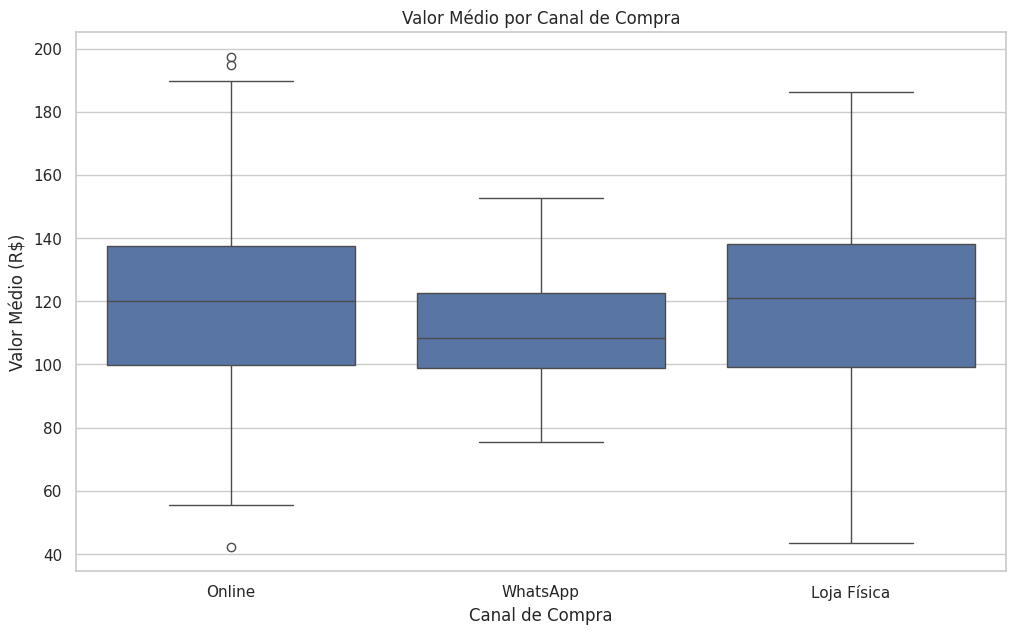

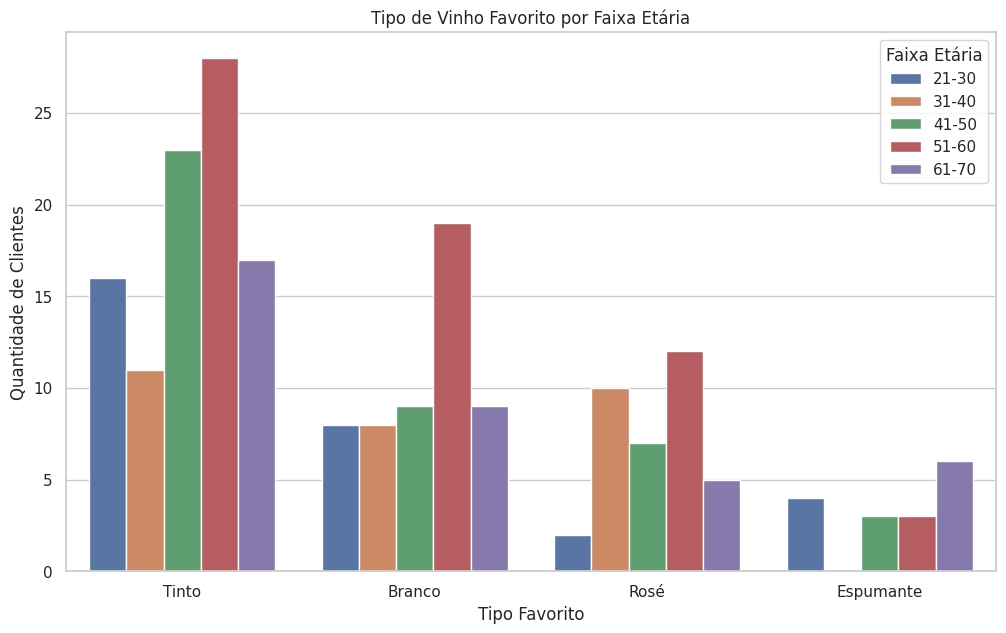

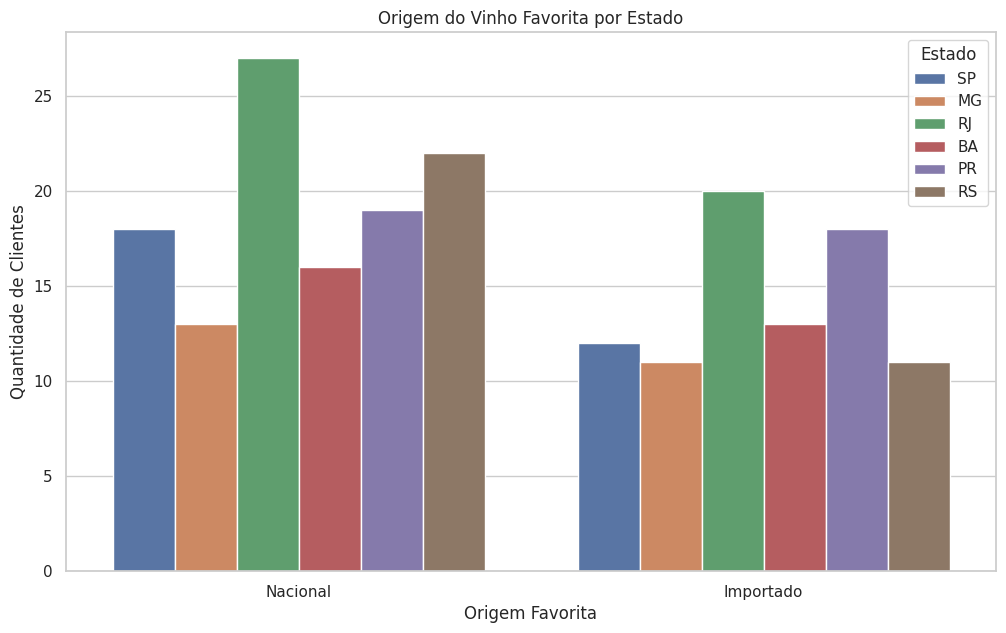

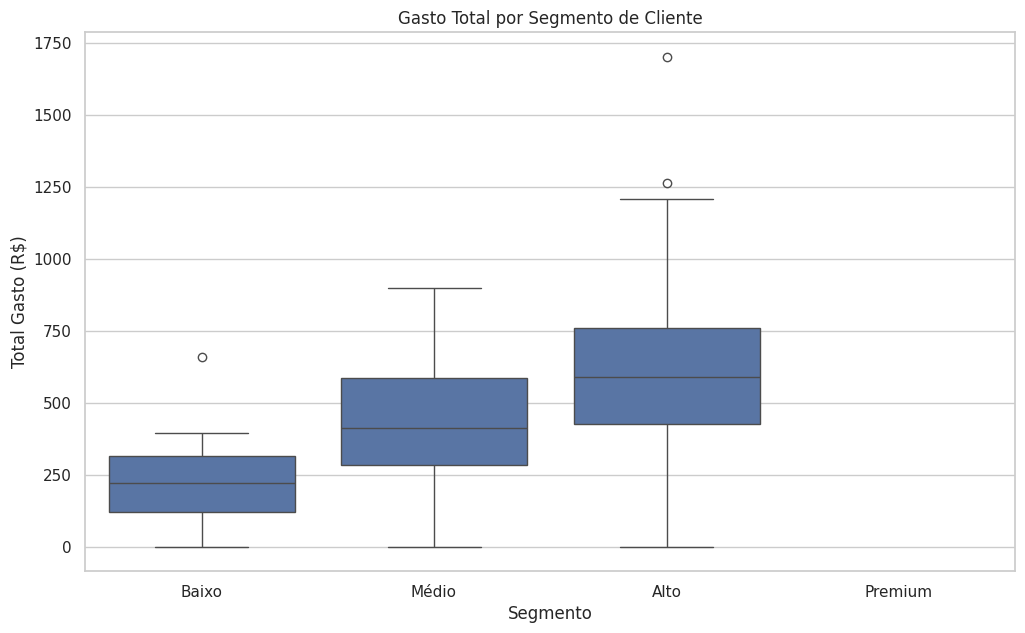

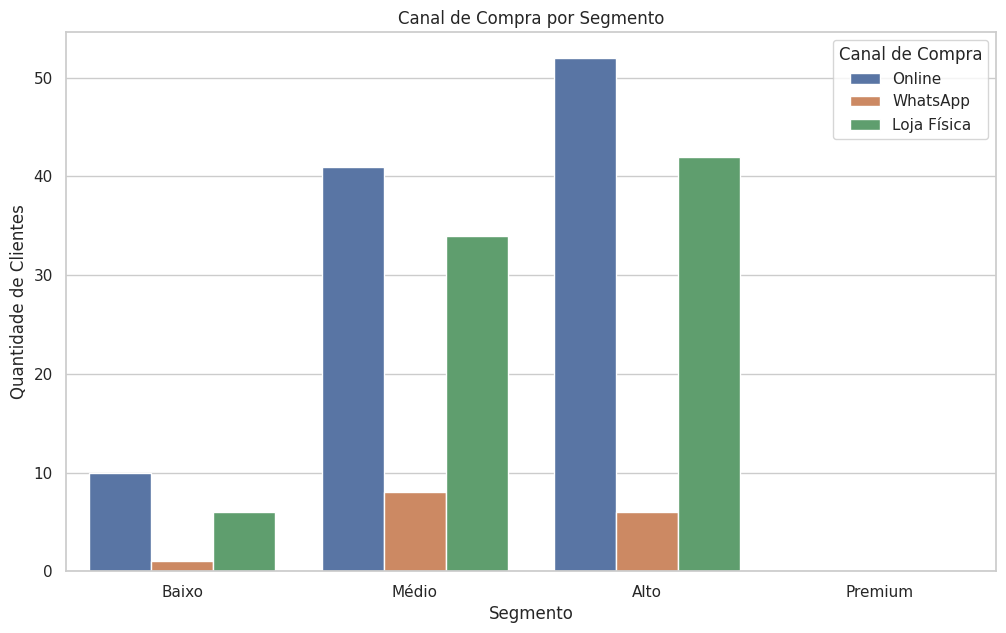

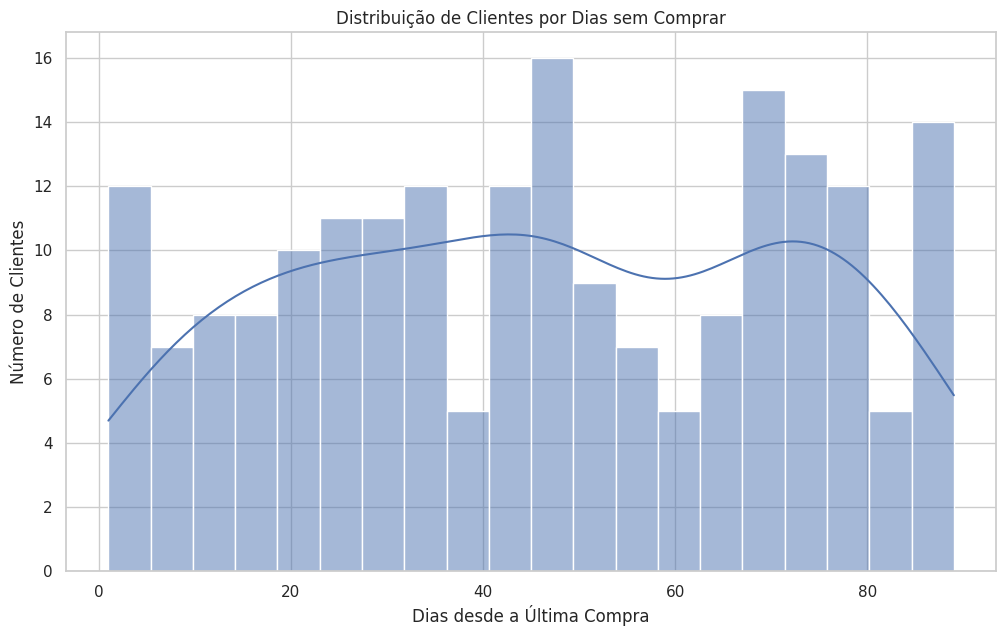

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 7)

# Carregar os dados
df = pd.read_csv("dados_clientes_vinhos.csv")
df['Última_Compra'] = pd.to_datetime(df['Última_Compra'])

# Criar coluna Faixa Etária
df['Faixa_Etária'] = pd.cut(df['Idade'], bins=[20, 30, 40, 50, 60, 70],
                            labels=['21-30', '31-40', '41-50', '51-60', '61-70'])

# Criar coluna Segmento baseado em Valor Médio
df['Segmento'] = pd.cut(df['Valor_Médio'], bins=[0, 80, 120, 200, 1000],
                       labels=['Baixo', 'Médio', 'Alto', 'Premium'])

# 1. Clientes por Estado
plt.figure()
sns.countplot(data=df, x='Estado', order=df['Estado'].value_counts().index)
plt.title("Clientes por Estado")
plt.ylabel("Quantidade de Clientes")
plt.show()

# 2. Distribuição por Sexo
plt.figure()
sns.countplot(data=df, x='Sexo')
plt.title("Distribuição por Sexo")
plt.ylabel("Quantidade de Clientes")
plt.show()

# 3. Distribuição por Faixa Etária
plt.figure()
sns.countplot(data=df, x='Faixa_Etária')
plt.title("Distribuição por Faixa Etária")
plt.ylabel("Quantidade de Clientes")
plt.show()

# 4. Frequência de Compra vs Total Gasto (scatter)
plt.figure()
sns.scatterplot(data=df, x='Frequência_Compra', y='Total_Gasto', hue='Sexo', palette='Set1')
plt.title("Frequência de Compra vs Total Gasto")
plt.xlabel("Frequência de Compra")
plt.ylabel("Total Gasto")
plt.legend(title='Sexo')
plt.show()

# 5. Valor Médio por Canal de Compra (boxplot)
plt.figure()
sns.boxplot(data=df, x='Canal_Compra', y='Valor_Médio')
plt.title("Valor Médio por Canal de Compra")
plt.xlabel("Canal de Compra")
plt.ylabel("Valor Médio (R$)")
plt.show()

# 6. Tipo Favorito por Faixa Etária
plt.figure()
sns.countplot(data=df, x='Tipo_Favorito', hue='Faixa_Etária')
plt.title("Tipo de Vinho Favorito por Faixa Etária")
plt.xlabel("Tipo Favorito")
plt.ylabel("Quantidade de Clientes")
plt.legend(title='Faixa Etária')
plt.show()

# 7. Origem Favorita por Estado
plt.figure()
sns.countplot(data=df, x='Origem_Favorita', hue='Estado')
plt.title("Origem do Vinho Favorita por Estado")
plt.xlabel("Origem Favorita")
plt.ylabel("Quantidade de Clientes")
plt.legend(title='Estado')
plt.show()

# 8. Gasto Total por Segmento
plt.figure()
sns.boxplot(data=df, x='Segmento', y='Total_Gasto')
plt.title("Gasto Total por Segmento de Cliente")
plt.xlabel("Segmento")
plt.ylabel("Total Gasto (R$)")
plt.show()

# 9. Canal de Compra por Segmento
plt.figure()
sns.countplot(data=df, x='Segmento', hue='Canal_Compra')
plt.title("Canal de Compra por Segmento")
plt.xlabel("Segmento")
plt.ylabel("Quantidade de Clientes")
plt.legend(title='Canal de Compra')
plt.show()

# 10. Distribuição de Dias sem Comprar
hoje = datetime(2025, 7, 3)
df['Dias_Sem_Comprar'] = (hoje - df['Última_Compra']).dt.days

plt.figure()
sns.histplot(df['Dias_Sem_Comprar'], bins=20, kde=True)
plt.title("Distribuição de Clientes por Dias sem Comprar")
plt.xlabel("Dias desde a Última Compra")
plt.ylabel("Número de Clientes")
plt.show()


ANÁLISE DE GRÁFICOS E INSIGHTS RELEVANTES

1. Clientes por Estado
O que mostra: Quantidade de clientes cadastrados em cada estado.

Por que é importante: Ajuda a entender onde está concentrada a base de clientes. Se um estado tem poucos clientes, pode ser foco para ações de marketing localizadas ou expansão.

Exemplo de ação: Investir em campanhas específicas em estados com menor presença.

2. Distribuição por Sexo
O que mostra: Quantidade de clientes homens e mulheres.

Por que é importante: Ajuda a identificar o perfil predominante do público, podendo direcionar o tom e o produto da comunicação.

Exemplo de ação: Criar promoções ou produtos específicos para o público majoritário.

3. Distribuição por Faixa Etária
O que mostra: Quantidade de clientes em diferentes faixas etárias (21-30, 31-40, etc).

Por que é importante: Permite identificar quais grupos etários são mais ativos e adequar a oferta para as preferências e comportamentos de cada faixa.

Exemplo de ação: Oferecer vinhos com preços e estilos que combinam com as preferências de cada faixa etária.

4. Frequência de Compra vs Total Gasto (scatter plot)
O que mostra: Relação entre quantas vezes o cliente compra e quanto ele gasta no total, com cores para diferenciar sexo.

Por que é importante: Identifica perfis como compradores frequentes com gastos baixos, ou compradores esporádicos mas de alto valor.

Exemplo de ação: Criar campanhas para incentivar clientes com baixa frequência a comprar mais, ou fidelizar compradores premium.

5. Valor Médio por Canal de Compra (boxplot)
O que mostra: Distribuição dos valores médios de compra para cada canal (online, loja física, WhatsApp).

Por que é importante: Entender onde os clientes gastam mais pode direcionar investimentos em canais mais rentáveis.

Exemplo de ação: Investir mais no canal online se ele tiver maior ticket médio, ou melhorar experiência na loja física.

6. Tipo Favorito por Faixa Etária
O que mostra: Quantidade de clientes que preferem cada tipo de vinho (tinto, branco, rosé, espumante) divididos por faixa etária.

Por que é importante: Revela as preferências de vinho por faixa etária, permitindo personalizar ofertas.

Exemplo de ação: Promover espumantes para faixas etárias que mais gostam, ajustar estoque para tipos preferidos.

7. Origem Favorita por Estado
O que mostra: Quantidade de clientes que preferem vinhos nacionais ou importados em cada estado.

Por que é importante: Entender preferência regional ajuda na gestão de estoque e campanhas regionais.

Exemplo de ação: Se um estado prefere vinhos nacionais, pode-se focar mais nesses produtos nessa região.

8. Gasto Total por Segmento
O que mostra: Boxplot do total gasto dos clientes agrupados por segmento de valor médio (Baixo, Médio, Alto, Premium).

Por que é importante: Avalia se segmentos de maior valor médio gastam proporcionalmente mais.

Exemplo de ação: Identificar quais segmentos geram maior receita e planejar estratégias para aumentar clientes nos segmentos premium.

9. Canal de Compra por Segmento
O que mostra: Quantidade de clientes de cada segmento que compram em cada canal.

Por que é importante: Revela preferência de canal de compra em diferentes segmentos, ajudando a direcionar marketing.

Exemplo de ação: Canal online pode ser mais forte no segmento premium; investir em marketing digital para esses clientes.

10. Distribuição de Dias sem Comprar
O que mostra: Histograma da quantidade de dias desde a última compra por cliente.

Por que é importante: Identifica clientes inativos ou em risco de churn (ex: mais de 60 dias sem comprar).

Exemplo de ação: Criar campanhas de reativação para clientes inativos.

